In [0]:
from time import sleep

def do_something_1(x, y):
    # Assume some complex calculation is occuring which takes
    # a second to compute
    sleep(1)
    return x + y + 2*x*y

def do_something_2(a, b):
    # Assume some complex calculation is occuring which takes
    # a second to compute
    sleep(1)
    return a**3 - b**3

def do_something_3(p, q):
    # Assume some complex calculation is occuring which takes
    # a second to compute
    sleep(1)
    return p*p + q*q

In [0]:
len_arr = 1000

# Array of even nos.
x = [i*2 for i in range(1, len_arr+1)]

# Array of multiples of 3
y = [i*3 for i in range(1, len_arr+1)]

# Array of multiples of 10
z = [i*10 for i in range(1, len_arr+1)]

final_result = []

In [3]:
%%time

for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

sum_arr = sum(final_result)

CPU times: user 2.95 ms, sys: 266 µs, total: 3.22 ms
Wall time: 15 s


## Using Dask @delayed

In [0]:
from dask import delayed, compute

@delayed
def do_something_1(x, y):
    #sleep(1)
    return x + y + 2*x*y

@delayed
def do_something_2(a, b):
    #sleep(1)
    return a**3 - b**3

@delayed
def do_something_3(p, q):
    #sleep(1)
    return p*p + q*q

In [0]:
final_result = []
for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

final_sum = sum(final_result)

In [24]:
%time final_sum.compute()

CPU times: user 668 ms, sys: 260 ms, total: 927 ms
Wall time: 765 ms


135720837893244328231707200

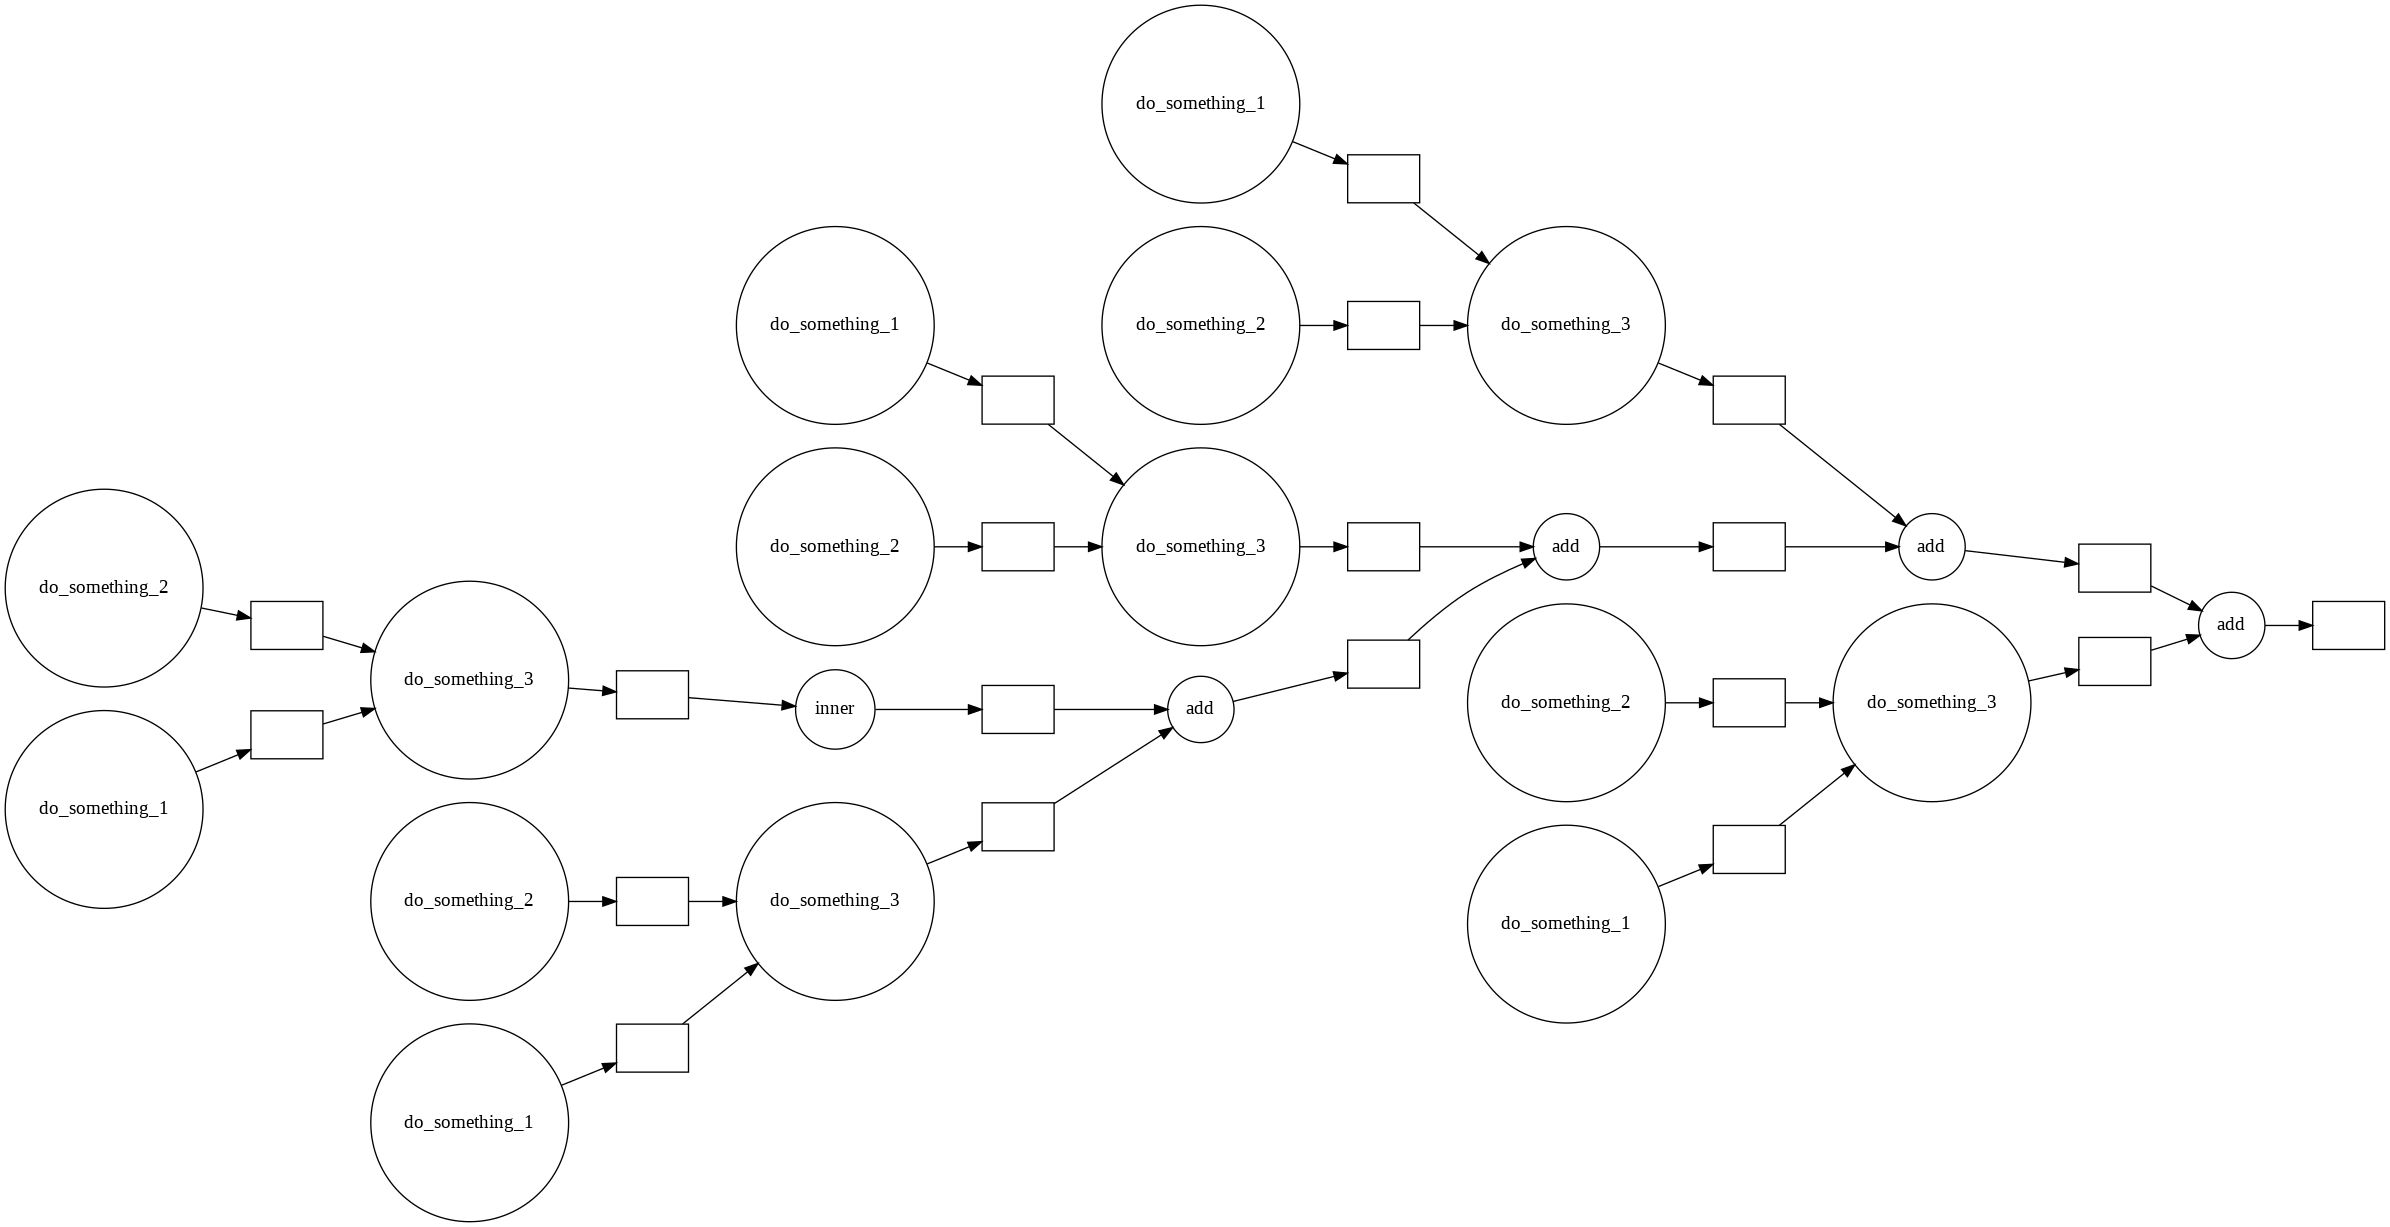

In [8]:
#final_sum.visualize(rankdir='LR')

In [0]:
final_result = []
for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

final_parallel_sum = delayed(sum)(final_result)

In [26]:
%time final_parallel_sum.compute()

CPU times: user 476 ms, sys: 212 ms, total: 688 ms
Wall time: 566 ms


135720837893244328231707200

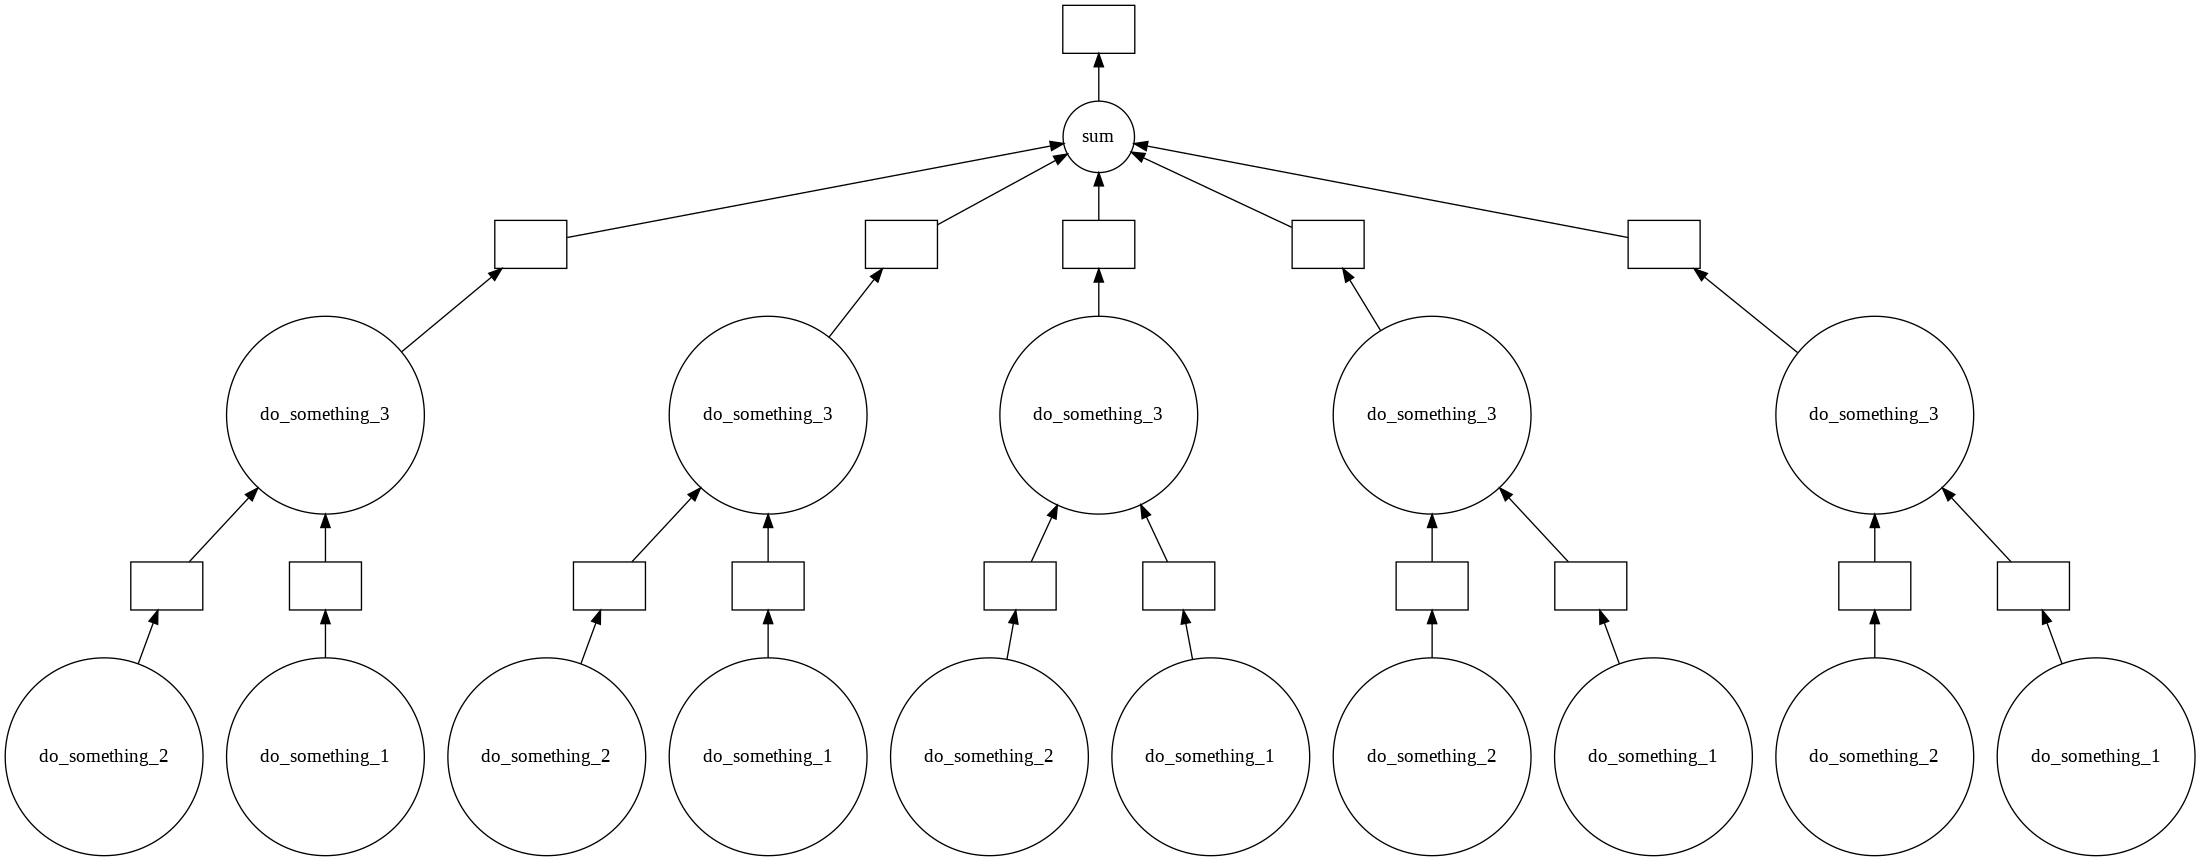

In [13]:
final_parallel_sum.visualize()